## Linear Regression for Housing Price Prediction

In [15]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

sns.set_style('whitegrid')


In [16]:

# Load dataset
df = pd.read_csv("Housing.csv")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:

df.info()
print("\nMissing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

Missing values per column:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad       

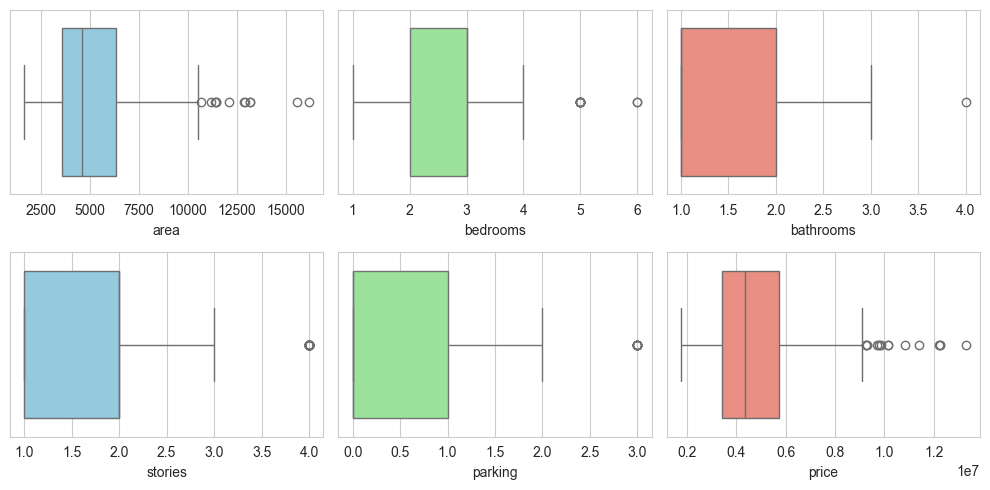

In [18]:

fig, axs = plt.subplots(2, 3, figsize=(10, 5))
sns.boxplot(x=df['area'], ax=axs[0,0], color='skyblue')
sns.boxplot(x=df['bedrooms'], ax=axs[0,1], color='lightgreen')
sns.boxplot(x=df['bathrooms'], ax=axs[0,2], color='salmon')
sns.boxplot(x=df['stories'], ax=axs[1,0], color='skyblue')
sns.boxplot(x=df['parking'], ax=axs[1,1], color='lightgreen')
sns.boxplot(x=df['price'], ax=axs[1,2], color='salmon')
plt.tight_layout()
plt.show()


In [19]:

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]
print("Dataset shape after outlier removal:", df.shape)


Dataset shape after outlier removal: (530, 13)


In [20]:
# Log-transform skewed variables
df['price'] = np.log1p(df['price'])
df['area'] = np.log1p(df['area'])

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,16.023785,8.699681,4,1,2,2,True,False,True,False,False,False,True,False
16,16.023785,8.794976,4,2,2,1,True,True,True,False,True,True,False,True
17,16.008281,9.047939,3,2,4,2,True,False,False,False,True,False,False,False
18,16.000438,8.434029,3,2,2,2,True,True,False,False,True,False,False,False
19,15.996493,8.767329,3,2,2,1,True,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,14.414348,8.006701,2,1,1,2,True,False,True,False,False,False,False,True
541,14.384879,7.783641,3,1,1,0,False,False,False,False,False,False,True,False
542,14.375127,8.194506,2,1,1,0,True,False,False,False,False,False,False,True
543,14.375127,7.976252,3,1,1,0,False,False,False,False,False,False,False,False


In [21]:
# Split features and target
X = df.drop('price', axis=1)
Y = df['price']

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)


In [22]:

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

mae = mean_absolute_error(Y_valid, Y_pred)
mse = mean_squared_error(Y_valid, Y_pred)
r2 = r2_score(Y_valid, Y_pred)
mape = mean_absolute_percentage_error(Y_valid, Y_pred)

print(f"Linear Regression Performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {np.sqrt(mse):.4f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.4f}")


Linear Regression Performance:
MAE: 0.1733
MSE: 0.0542
RMSE: 0.2328
R²: 0.6800
MAPE: 0.0114


In [23]:

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)
Y_pred_ridge = ridge.predict(X_valid)

print("\nRidge Regression Performance:")
print(f"MAE: {mean_absolute_error(Y_valid, Y_pred_ridge):.4f}")
print(f"MSE: {mean_squared_error(Y_valid, Y_pred_ridge):.4f}")
print(f"R²: {r2_score(Y_valid, Y_pred_ridge):.4f}")



Ridge Regression Performance:
MAE: 0.1733
MSE: 0.0542
R²: 0.6798


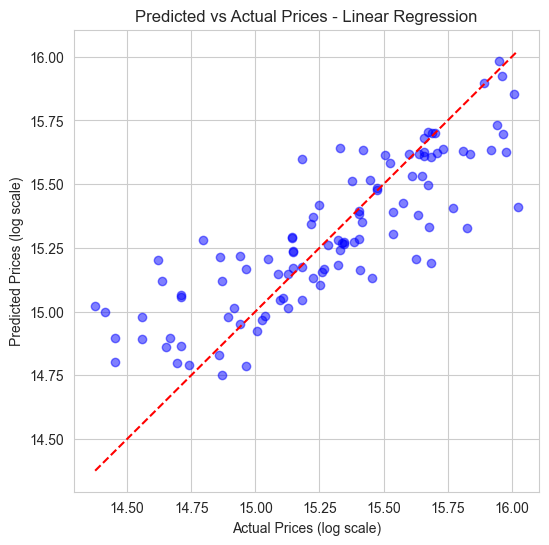

In [24]:

plt.figure(figsize=(6,6))
plt.scatter(Y_valid, Y_pred, alpha=0.5, color='blue')
plt.plot([Y_valid.min(), Y_valid.max()], [Y_valid.min(), Y_valid.max()], 'r--')
plt.xlabel("Actual Prices (log scale)")
plt.ylabel("Predicted Prices (log scale)")
plt.title("Predicted vs Actual Prices - Linear Regression")
plt.show()
